In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
mpl.style.use('seaborn') 
warnings.filterwarnings("ignore")

### The dataset is taken from kaggle. You can also download it following the link below:
https://www.kaggle.com/imdevskp/corona-virus-report

In [46]:
df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [47]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  188
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', '

In [48]:
# Check if the dataframe contains NaN values
df.isna().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [49]:
# Replace NaN values by 0
df.fillna(0, inplace=True)
# Remove columns
df = df.drop(['Lat','Long','Province/State'], axis=1)
# Rename the columns so that they make sense
df.rename (columns = {'Country/Region':'Country'}, inplace = True)
# Group datas by Country
df['active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
top = df[df['Date'] == df['Date'].max()]

world = top.groupby('Country')['Confirmed','active','Deaths'].sum()
world = top.groupby('Country')['Confirmed','active','Deaths'].sum().reset_index()
world.head()

,Country,Confirmed,active,Deaths
0,Afghanistan,11173,9857,219
1,Albania,1004,177,32
2,Algeria,8503,3147,609
3,Andorra,763,49,51
4,Angola,70,48,4


In [50]:
#PLOTTING ON WORLD MAP
figure = px.choropleth(world, locations="Country", locationmode='country names' 
                       , color="active",hover_name="Country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Active Cases in World")
figure.show()

In [51]:
world_cases = []
total_recovered = [] 
total_deaths = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = df.Confirmed.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()
world_cases.append(confirmed_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [52]:
print ('Total Confirmed Cases= '+ str(confirmed_sum))
print ('Total Recovered Cases= '+ str(recovered_sum))
print ('Total Deaths Cases= '+ str(death_sum))
print ('Total Recovery Rate(%)= '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%)= '+ str(mean_mortality_rate*100))

Total Confirmed Cases= 183190009
Total Recovered Cases= 57256656
Total Deaths Cases= 12131584
Total Recovery Rate(%)= 31.255337729690268
Total Fatality Rate(%)= 6.622404827765472


In [53]:
top = top.groupby('Country').sum()
top_active = top.sort_values('active', ascending=False).reset_index()
top_active.head(20).style.background_gradient(cmap='Reds')

,Country,Confirmed,Deaths,Recovered,active
0,US,1662302,98220,379157,1184925
1,Russia,353427,3633,118798,230996
2,United Kingdom,262547,36996,1161,224390
3,Brazil,374898,23473,153833,197592
4,France,183067,28460,65317,89290
5,Canada,87119,6655,0,80464
6,India,144950,4172,60706,80072
7,Peru,123979,3629,50949,69401
8,Spain,235400,26834,150376,58190
9,Italy,230158,32877,141981,55300


In [54]:
top_active = top_active.head(20)

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

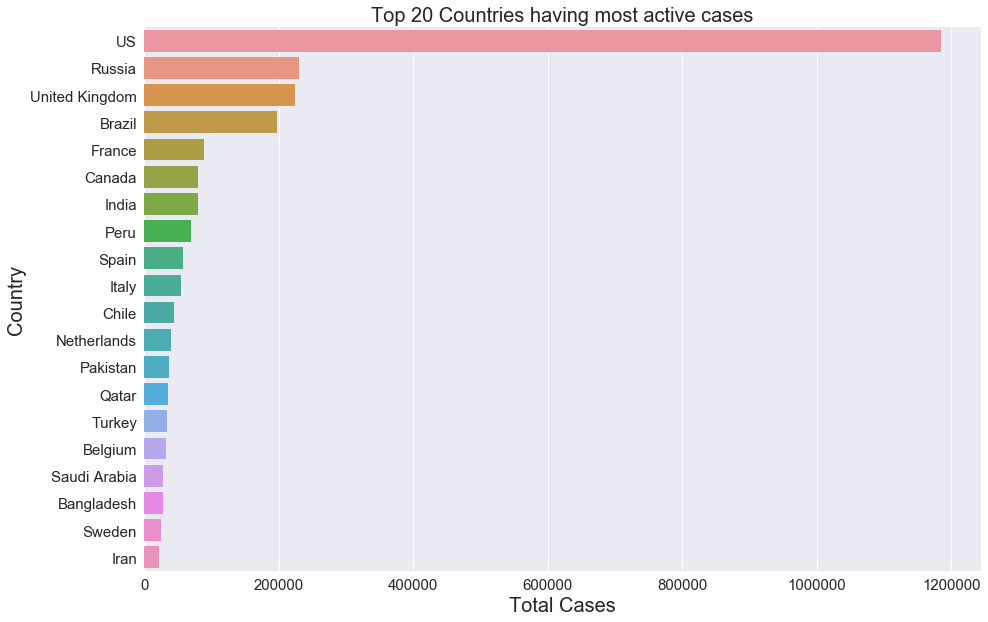

In [55]:
#PLOTTING top 20 active cases country
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 20 Countries having most active cases",fontsize=20)
ax = sns.barplot(x=top_active.active,y=top_active.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

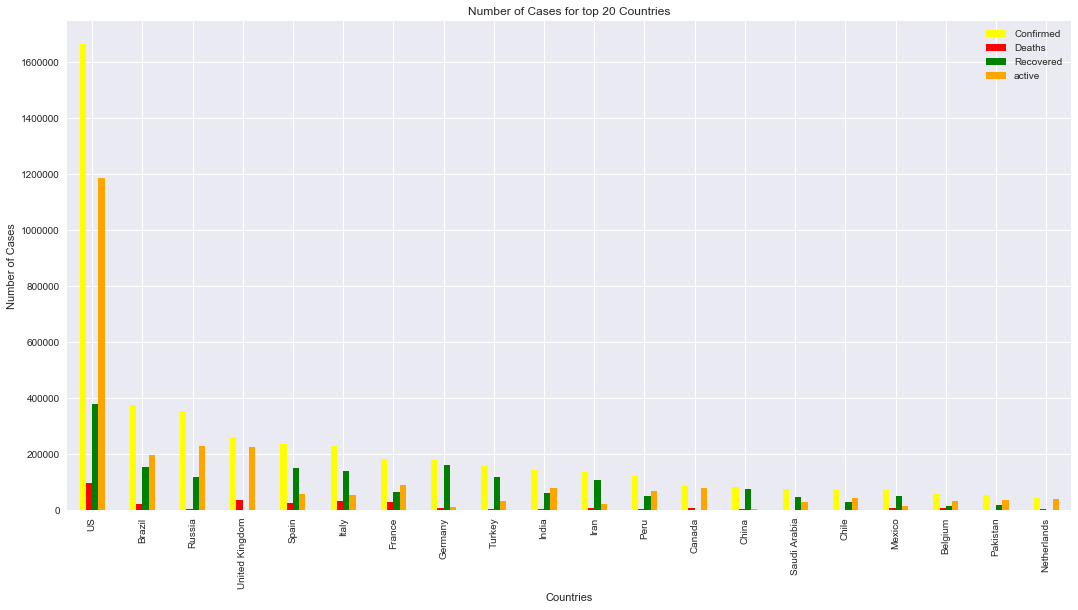

In [56]:
### Sort the top countries by Confirmed cases
top.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top entries
top_countries = top.head(20)
### Show Unstacked Histogram
top_countries.plot(kind='bar', figsize=(18, 9), stacked=False, 
            color=['yellow', 'red', 'green', 'orange'])
plt.title('Number of Cases for top 20 Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.show()

### Prediction using Prophet

In [57]:
from fbprophet import Prophet

In [58]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [59]:
confirmed.columns = ['ds','y']
deaths.columns =['ds','y']
recovered.columns =['ds','y']

In [60]:
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
deaths['ds'] = pd.to_datetime(deaths['ds'])  
recovered['ds'] = pd.to_datetime(recovered['ds'])  

#### Prediction for confirmed cases

In [61]:
model = Prophet(interval_width=0.95) 
model.fit(confirmed)  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future = model.make_future_dataframe(periods=10) 
future.tail(10)

,ds
125,2020-05-26
126,2020-05-27
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31
131,2020-06-01
132,2020-06-02
133,2020-06-03
134,2020-06-04


In [63]:
#forcast the predicted values
forecast = model.predict(future)
#data of prediction
forecast.head(10)  

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-3768.451480,-29796.598630,14600.911942,-3768.451480,-3768.451480,-4666.884214,-4666.884214,-4666.884214,-4666.884214,-4666.884214,-4666.884214,0.0,0.0,0.0,-8435.335693
1,2020-01-23,-2226.886615,-23833.069767,20151.098244,-2226.886615,-2226.886615,-316.048046,-316.048046,-316.048046,-316.048046,-316.048046,-316.048046,0.0,0.0,0.0,-2542.934661
2,2020-01-24,-685.321750,-18877.148098,25905.588920,-685.321750,-685.321750,4054.100258,4054.100258,4054.100258,4054.100258,4054.100258,4054.100258,0.0,0.0,0.0,3368.778509
3,2020-01-25,856.243115,-16566.951290,29392.498793,856.243115,856.243115,4617.377962,4617.377962,4617.377962,4617.377962,4617.377962,4617.377962,0.0,0.0,0.0,5473.621078
4,2020-01-26,2397.807980,-17557.702565,27511.722674,2397.807980,2397.807980,3019.034771,3019.034771,3019.034771,3019.034771,3019.034771,3019.034771,0.0,0.0,0.0,5416.842751
5,2020-01-27,3939.375845,-20551.721591,25337.958018,3939.375845,3939.375845,-1120.868200,-1120.868200,-1120.868200,-1120.868200,-1120.868200,-1120.868200,0.0,0.0,0.0,2818.507645
6,2020-01-28,5480.943709,-21773.962331,21830.100651,5480.943709,5480.943709,-5586.712532,-5586.712532,-5586.712532,-5586.712532,-5586.712532,-5586.712532,0.0,0.0,0.0,-105.768822
7,2020-01-29,7022.511574,-21750.928954,24849.873822,7022.511574,7022.511574,-4666.884214,-4666.884214,-4666.884214,-4666.884214,-4666.884214,-4666.884214,0.0,0.0,0.0,2355.627360
8,2020-01-30,8564.079438,-16344.957295,29316.891786,8564.079438,8564.079438,-316.048046,-316.048046,-316.048046,-316.048046,-316.048046,-316.048046,0.0,0.0,0.0,8248.031392
9,2020-01-31,11882.933874,-5541.487691,37723.774399,11882.933874,11882.933874,4054.100258,4054.100258,4054.100258,4054.100258,4054.100258,4054.100258,0.0,0.0,0.0,15937.034132


In [64]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
125,2020-05-26,5.531225e+06,5.508350e+06,5.552487e+06
126,2020-05-27,5.620821e+06,5.595429e+06,5.644257e+06
127,2020-05-28,5.713849e+06,5.685882e+06,5.738078e+06
128,2020-05-29,5.806895e+06,5.775244e+06,5.838274e+06
129,2020-05-30,5.896135e+06,5.858487e+06,5.937687e+06
130,2020-05-31,5.983213e+06,5.934345e+06,6.039706e+06
131,2020-06-01,6.067749e+06,6.004358e+06,6.138847e+06
132,2020-06-02,6.151960e+06,6.079284e+06,6.236383e+06
133,2020-06-03,6.241556e+06,6.148261e+06,6.336531e+06
134,2020-06-04,6.334584e+06,6.228688e+06,6.447901e+06


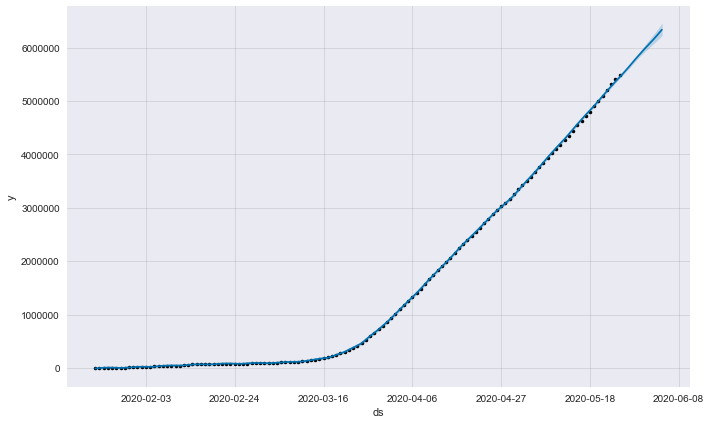

In [65]:
confirmed_forecast_plot = model.plot(forecast)

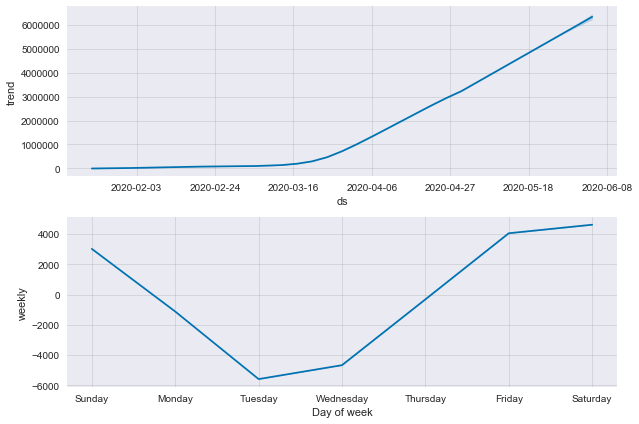

In [66]:
confirmed_forecast_plot = model.plot_components(forecast)